<a href="https://colab.research.google.com/github/juanalistapablo/MAIT-Monitoria-IA/blob/main/HIPERPARAMETROS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean as distancia_euclidiana
from itertools import permutations

def calcular_distancia_rota(rota):
  """
  Esta função calcula a distância total de uma rota, somando as distâncias
  euclidianas entre pontos consecutivos da rota fornecida.

  Parameters:
  rota (list): Uma lista de pontos (tuplas) onde cada ponto representa uma posição no espaço.

  Returns:
  float: A distância total percorrida na rota.
  """

  distancia = 0  # Inicializa a variável que armazenará a distância total.
  tamanho_rota = len(rota)  # Armazena o número total de pontos na rota.

  # Itera sobre cada ponto na rota.
  for i in range(tamanho_rota):
      # Verifica se o ponto atual não é o último na rota.
      if i < tamanho_rota - 1:
          # Calcula e acumula a distância euclidiana entre o ponto atual e o próximo.
          distancia = distancia + distancia_euclidiana(rota[i], rota[i+1])

  return distancia  # Retorna a distância total calculada.


def desenhar_rota(rota):
  tamanho_rota = len(rota)
  distancia_percorrida = 0

  for i in range(tamanho_rota):
    x,y = rota[i]

    cor = "black"
    if i == 0:
      cor = "blue"
    elif i == tamanho_rota - 1:
      cor = "red"

    plt.scatter(x, y, color=cor)
    plt.annotate(f"({x}, {y})", (x, y))
    if i < tamanho_rota - 1:
      x1, y1 = rota[i+1]
      dx = x1 - x
      dy = y1 - y
      plt.arrow(x, y, dx, dy, color="black", head_width = 0.1)

  distancia_percorrida = calcular_distancia_rota(rota)
  plt.title(f'Rota com distancia de {round(distancia_percorrida, 2)}')
  plt.show()



def forca_bruta(origem, destino, enderecos):
    # Inicializa a variável que vai armazenar a menor distância encontrada
    # com infinito, pois qualquer distância calculada será menor que infinito.
    menor_distancia = float('inf')

    # Inicializa a variável que vai armazenar a rota correspondente à menor distância
    # com None, pois ainda não encontramos nenhuma rota.
    menor_rota = None

    # Itera sobre todas as permutações possíveis dos endereços.
    # permutations(enderecos) retorna todas as possíveis ordenações dos endereços,
    # ou seja, todas as rotas possíveis (sem considerar origem e destino).
    for permutacao in permutations(enderecos):
        # Cria uma rota completa adicionando a origem no início da permutação
        # dos endereços e o destino no final.
        rota = [origem] + list(permutacao) + [destino]

        # Calcula a distância total da rota usando a função calcular_distancia_rota
        distancia_rota = calcular_distancia_rota(rota)

        # Verifica se a distância da rota calculada é menor que a menor distância encontrada até agora.
        # Se for, atualiza as variáveis menor_distancia e menor_rota.
        if distancia_rota < menor_distancia:
            menor_distancia = distancia_rota
            menor_rota = rota

    # Retorna a menor rota encontrada e sua respectiva distância.
    return menor_rota, menor_distancia

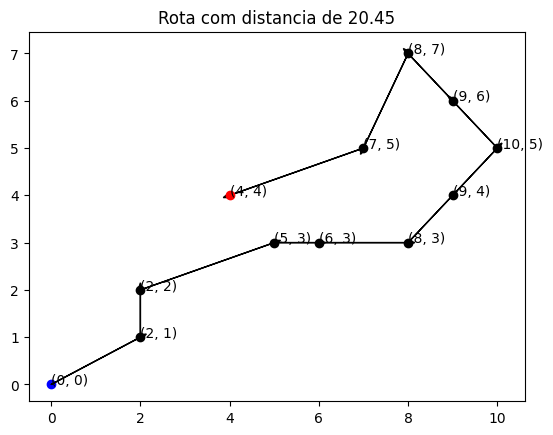

In [41]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3), (9, 6), (7, 5)]# 10! vezes reperesenta o numero permutações calculadas

menor_rota, menor_distancia = forca_bruta(origem, destino, enderecos)
desenhar_rota(menor_rota)

In [35]:
def avaliar(individuo, origem, enderecos, destino):
  rota = [origem]
  for i in individuo:
     rota.append(enderecos[i])
  rota.append(destino)

  distancia_percorrida = calcular_distancia_rota(rota)

  return distancia_percorrida,

In [7]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 3.5 MB/s eta 0:00:00


In [36]:
from deap import base, creator, tools, algorithms
import numpy as np

In [37]:
# Define o tamanho da população inicial
tam_populacao_inicial = 100
# Define a probabilidade de cruzamento
prob_cruzamento = 0.9
# Define a probabilidade de mutação
prob_mutacao = 0.1
# Define o número de gerações
numero_geracoes = 200

# Cria o tipo 'FitnessMin' que visa minimizar o valor da função objetivo (distância da rota)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# Cria o tipo 'Individuo', que é uma lista com um atributo de fitness do tipo 'FitnessMin'
creator.create("Individuo", list, fitness=creator.FitnessMin)

# Inicializa uma caixa de ferramentas para armazenar as configurações do algoritmo
toolbox = base.Toolbox()
# Registra a função 'Genes', que gera uma permutação aleatória de índices dos endereços
toolbox.register("Genes", np.random.permutation, len(enderecos))
# Registra a função 'Individuos', que inicializa um indivíduo (rota) usando 'Genes'
toolbox.register("Individuos", tools.initIterate, creator.Individuo, toolbox.Genes)

# Registra a função 'Populacao', que cria uma população de indivíduos
toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)
# Cria a população inicial com 'tam_populacao_inicial' indivíduos
populacao = toolbox.Populacao(n=tam_populacao_inicial)

# Registra o operador de cruzamento do tipo 'cxPartialyMatched'
toolbox.register("mate", tools.cxPartialyMatched)
# Registra o operador de mutação do tipo 'mutShuffleIndexes' com probabilidade de mutação por bit 'indpb'
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=prob_mutacao)
# Registra o operador de seleção do tipo 'selTournament' com tamanho do torneio '3'
toolbox.register("select", tools.selTournament, tournsize=3)
# Registra a função de avaliação 'avaliar' com os argumentos de origem, endereços e destino
toolbox.register("evaluate", avaliar, origem=origem, enderecos=enderecos, destino=destino)

# Executa o algoritmo genético simples com os operadores e parâmetros definidos anteriormente
algoritmo = algorithms.eaSimple(populacao,
                                toolbox,
                                cxpb=prob_cruzamento,  # Probabilidade de cruzamento
                                mutpb=prob_cruzamento,  # Probabilidade de mutação
                                ngen=numero_geracoes,  # Número de gerações
                                verbose=False)  # Desativa a saída de log detalhada

# Seleciona o melhor indivíduo da população final
melhor_ind = tools.selBest(populacao, 1)[0]


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [43]:
def algoritmo_genetico(origem, destino, enderecos, tam_populacao_inicial=100, prob_cruzamento=0.7, prob_mutacao=0.1, numero_geracoes=100):

  # Cria o tipo 'FitnessMin' que visa minimizar o valor da função objetivo (distância da rota)
  creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
  # Cria o tipo 'Individuo', que é uma lista com um atributo de fitness do tipo 'FitnessMin'
  creator.create("Individuo", list, fitness=creator.FitnessMin)

  # Inicializa uma caixa de ferramentas para armazenar as configurações do algoritmo
  toolbox = base.Toolbox()
  # Registra a função 'Genes', que gera uma permutação aleatória de índices dos endereços
  toolbox.register("Genes", np.random.permutation, len(enderecos))
  # Registra a função 'Individuos', que inicializa um indivíduo (rota) usando 'Genes'
  toolbox.register("Individuos", tools.initIterate, creator.Individuo, toolbox.Genes)

  # Registra a função 'Populacao', que cria uma população de indivíduos
  toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)
  # Cria a população inicial com 'tam_populacao_inicial' indivíduos
  populacao = toolbox.Populacao(n=tam_populacao_inicial)

  # Registra o operador de cruzamento do tipo 'cxPartialyMatched'
  toolbox.register("mate", tools.cxPartialyMatched)
  # Registra o operador de mutação do tipo 'mutShuffleIndexes' com probabilidade de mutação por bit 'indpb'
  toolbox.register("mutate", tools.mutShuffleIndexes, indpb=prob_mutacao)
  # Registra o operador de seleção do tipo 'selTournament' com tamanho do torneio '3'
  toolbox.register("select", tools.selTournament, tournsize=3)
  # Registra a função de avaliação 'avaliar' com os argumentos de origem, endereços e destino
  toolbox.register("evaluate", avaliar, origem=origem, enderecos=enderecos, destino=destino)

  # Executa o algoritmo genético simples com os operadores e parâmetros definidos anteriormente
  algoritmo = algorithms.eaSimple(populacao,
                                  toolbox,
                                  cxpb=prob_cruzamento,  # Probabilidade de cruzamento
                                  mutpb=prob_cruzamento,  # Probabilidade de mutação
                                  ngen=numero_geracoes,  # Número de gerações
                                  verbose=False)  # Desativa a saída de log detalhada

  # Seleciona o melhor indivíduo da população final
  melhor_ind = tools.selBest(populacao, 1)[0]


  # Inicializa a variável menor_rota com o ponto de origem
  menor_rota = [origem]

  # Itera sobre os índices contidos no melhor indivíduo encontrado
  # Cada índice em melhor_ind corresponde a um endereço na lista de endereços
  for i in melhor_ind:
      # Adiciona o endereço correspondente ao índice i na lista menor_rota
      menor_rota.append(enderecos[i])

  # Após iterar por todos os endereços, adiciona o ponto de destino à lista menor_rota
  menor_rota.append(destino)

  # Calcula distancia percorrida
  distancia_percorrida = calcular_distancia_rota(menor_rota)

  return menor_rota, distancia_percorrida

In [3]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3), (9, 6), (7, 5)]

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


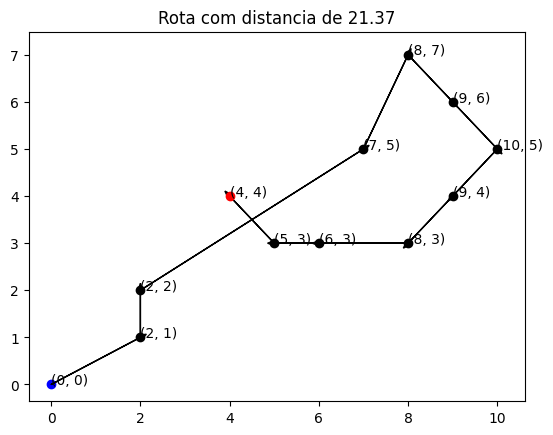

In [42]:
menor_rota, distancia_percorrida = algoritmo_genetico(origem, destino, enderecos, numero_geracoes=100)
desenhar_rota(menor_rota)